## ARIMA

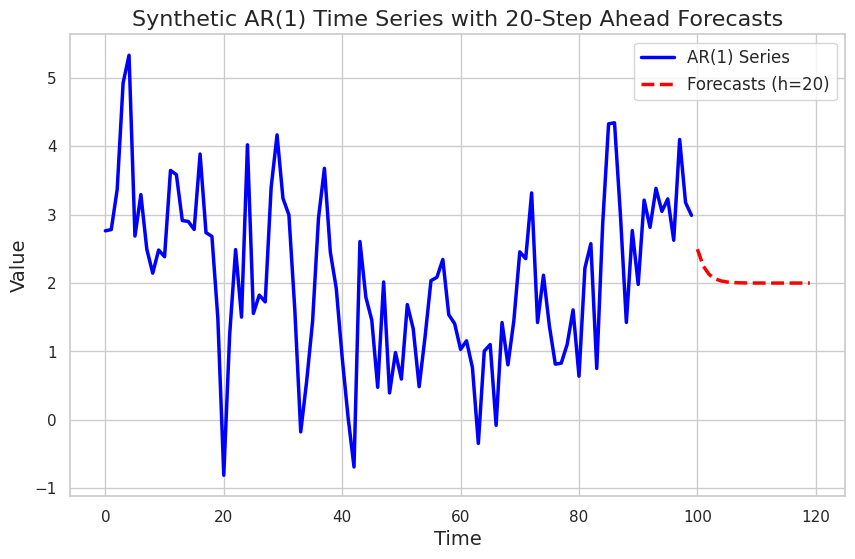

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c = 1  
phi = 0.5 
sigma = 1 
n_steps = 100
forecast_steps = 20

np.random.seed(0)  
errors = np.random.normal(0, sigma, n_steps)  
y = np.zeros(n_steps)  
y[0] = c + errors[0]  
for t in range(1, n_steps):  
    y[t] = c + phi * y[t-1] + errors[t]


forecast = np.zeros(n_steps + forecast_steps)  
forecast[:n_steps] = y  
for t in range(n_steps, n_steps + forecast_steps):
    forecast[t] = c + phi * forecast[t-1]

sns.set(style="whitegrid")  

plt.figure(figsize=(10, 6))  


plt.plot(y, label='AR(1) Series', linewidth=2.5, color='blue')  


plt.plot(range(n_steps, n_steps + forecast_steps), forecast[n_steps:], linestyle='--', label=f'Forecasts (h={forecast_steps})', linewidth=2.5, color='red')  


plt.title('Synthetic AR(1) Time Series with 20-Step Ahead Forecasts', fontsize=16)  
plt.xlabel('Time', fontsize=14)  
plt.ylabel('Value', fontsize=14)  

plt.legend(fontsize=12)  


plt.show()

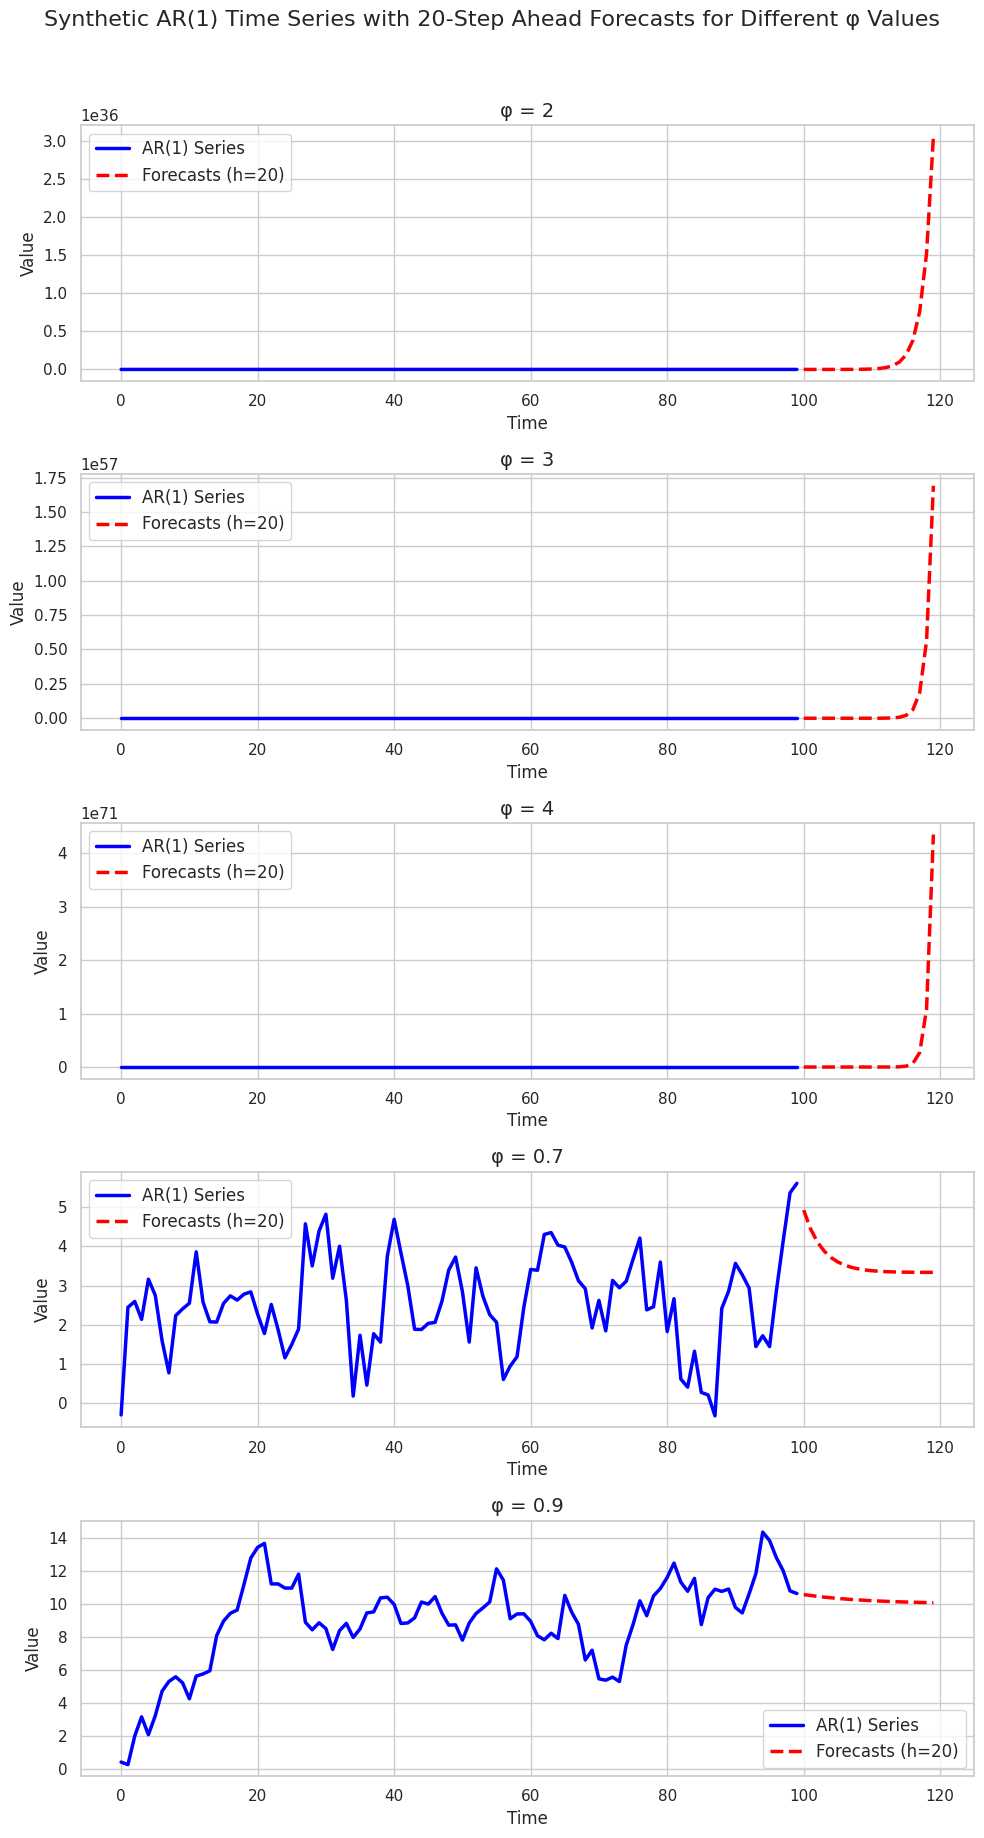

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


c = 1  
phis = [2, 3, 4, 0.7, 0.9, ]
sigma = 1  
n_steps = 100
forecast_steps = 20  

sns.set(style="whitegrid")

fig, axes = plt.subplots(5, 1, figsize=(10, 18))  
fig.suptitle('Synthetic AR(1) Time Series with 20-Step Ahead Forecasts for Different φ Values', fontsize=16, y=1.02)

np.random.seed(0)  
for i, phi in enumerate(phis):
    errors = np.random.normal(0, sigma, n_steps)  
    y = np.zeros(n_steps)  
    y[0] = c + errors[0]  
    for t in range(1, n_steps):  
        y[t] = c + phi * y[t-1] + errors[t]


    forecast = np.zeros(n_steps + forecast_steps) 
    forecast[:n_steps] = y 
    for t in range(n_steps, n_steps + forecast_steps):  
        forecast[t] = c + phi * forecast[t-1]


    axes[i].plot(y, label='AR(1) Series', linewidth=2.5, color='blue') 
    axes[i].plot(range(n_steps, n_steps + forecast_steps), forecast[n_steps:], linestyle='--', label=f'Forecasts (h={forecast_steps})', linewidth=2.5, color='red')  


    axes[i].set_title(f'φ = {phi}', fontsize=14)
    axes[i].set_xlabel('Time', fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)

  
    axes[i].legend(fontsize=12)


plt.tight_layout()

plt.show()

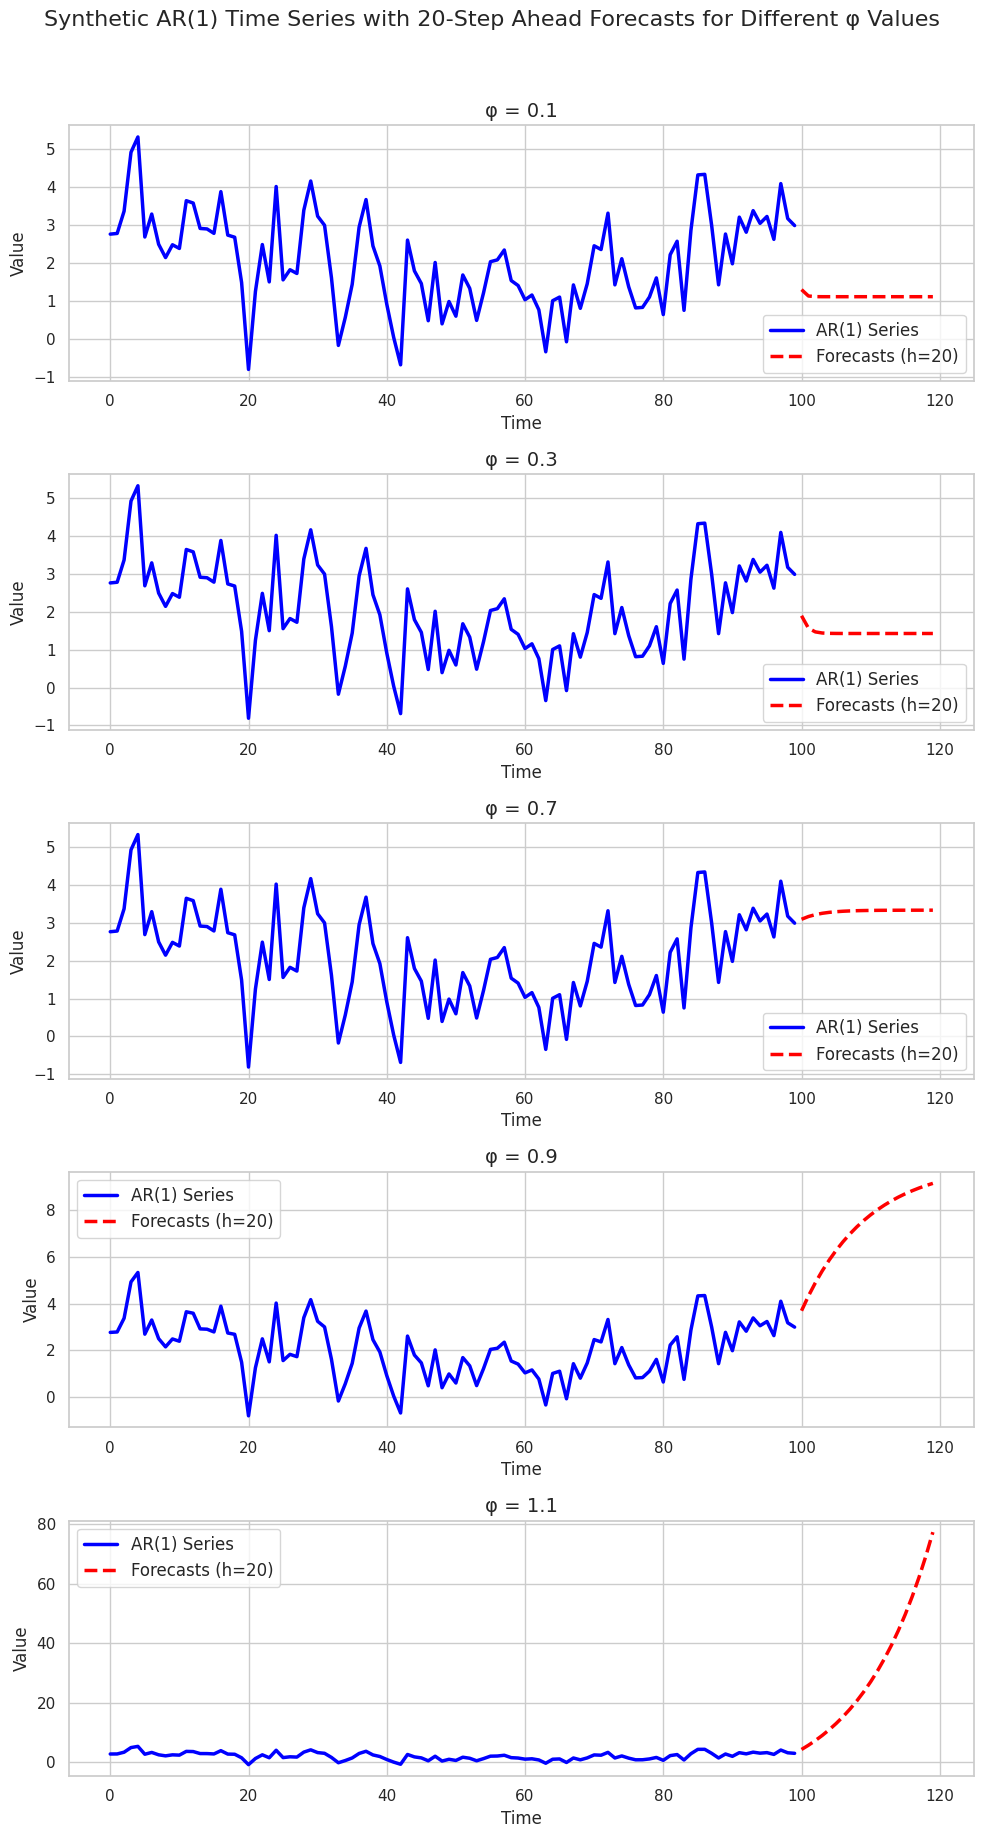

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c = 1  
phis = [0.1, 0.3, 0.7, 0.9, 1.1] 
sigma = 1 
n_steps = 100 
forecast_steps = 20  

sns.set(style="whitegrid")


fig, axes = plt.subplots(5, 1, figsize=(10, 18))  
fig.suptitle('Synthetic AR(1) Time Series with 20-Step Ahead Forecasts for Different φ Values', fontsize=16, y=1.02)


np.random.seed(0)  
errors = np.random.normal(0, sigma, n_steps)  
y = np.zeros(n_steps)  
y[0] = c + errors[0]  
for t in range(1, n_steps): 
    y[t] = c + 0.5 * y[t-1] + errors[t]  


for i, phi in enumerate(phis):

    forecast = np.zeros(n_steps + forecast_steps) 
    forecast[:n_steps] = y  


    for t in range(n_steps, n_steps + forecast_steps): 
        forecast[t] = c + phi * forecast[t-1]


    axes[i].plot(y, label='AR(1) Series', linewidth=2.5, color='blue')  
    axes[i].plot(range(n_steps, n_steps + forecast_steps), forecast[n_steps:], linestyle='--', label=f'Forecasts (h={forecast_steps})', linewidth=2.5, color='red')  

    
    axes[i].set_title(f'φ = {phi}', fontsize=14)
    axes[i].set_xlabel('Time', fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)

    
    axes[i].legend(fontsize=12)


plt.tight_layout()


plt.show()

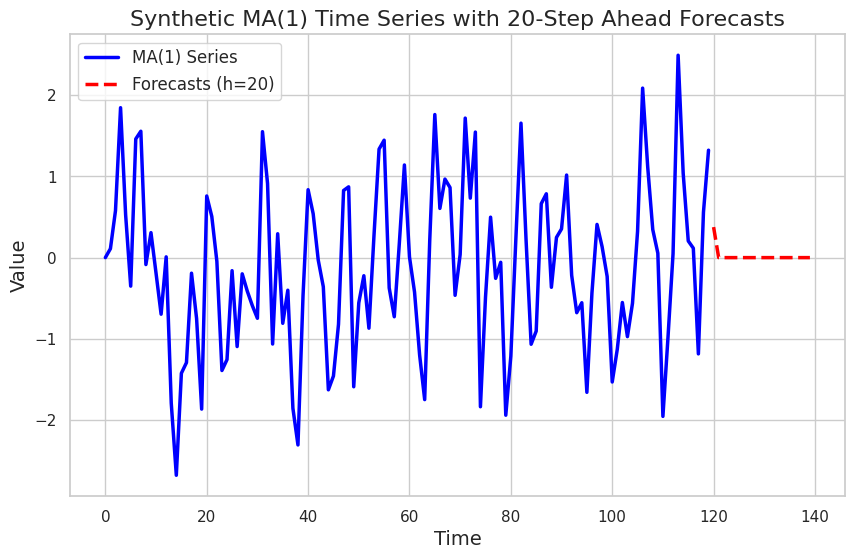

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


mu = 0          
theta = 0.5     
sigma = 1       
n_steps = 120   
forecast_steps = 20  


np.random.seed(42)
epsilon = np.random.normal(0, sigma, n_steps + forecast_steps)


y = np.zeros(n_steps)
for t in range(1, n_steps):
    y[t] = mu + theta * epsilon[t-1] + epsilon[t]


forecast = np.zeros(n_steps + forecast_steps)
forecast[:n_steps] = y
for t in range(n_steps, n_steps + forecast_steps):
    if t == n_steps:
        forecast[t] = mu + theta * epsilon[t-1]  
    else:
        forecast[t] = mu 


sns.set(style="whitegrid")  

plt.figure(figsize=(10, 6))  


plt.plot(y, label='MA(1) Series', linewidth=2.5, color='blue')  


plt.plot(range(n_steps, n_steps + forecast_steps), forecast[n_steps:], 
         linestyle='--', label=f'Forecasts (h={forecast_steps})', linewidth=2.5, color='red')  


plt.title('Synthetic MA(1) Time Series with 20-Step Ahead Forecasts', fontsize=16)  
plt.xlabel('Time', fontsize=14)  
plt.ylabel('Value', fontsize=14)  


plt.legend(fontsize=12)  


plt.show()

## ARIMA(p, d, q)

In [ ]:

def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

adf_test(ts_data)

ADF Statistic: -4.727657010405312
p-value: 7.464161473450784e-05
The series is stationary.


## ARIMA Tutorials V2

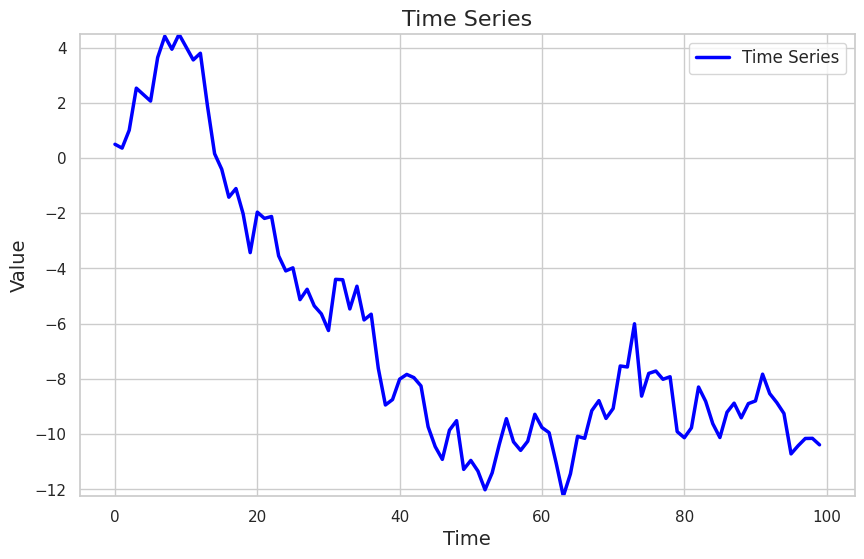

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA


sns.set(style="whitegrid")  


def generate_nonstationary_series(n=100):
    np.random.seed(42)
    random_walk = np.cumsum(np.random.normal(0, 1, n))  
    return pd.Series(random_walk)

ts_data = generate_nonstationary_series()


plt.figure(figsize=(10, 6))  
plt.plot(ts_data, label='Time Series', linewidth=2.5, color='blue')  
plt.title("Time Series", fontsize=16)  
plt.xlabel("Time", fontsize=14)  
plt.ylabel("Value", fontsize=14)  
plt.ylim(bottom=min(ts_data), top=max(ts_data))  
plt.legend(fontsize=12)
plt.show()

In [ ]:

def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary, differencing is required.")

print("ADF Test for Original Series:")
adf_test(ts_data)

ADF Test for Original Series:
ADF Statistic: -1.3583317659818992
p-value: 0.6020814791099098
The series is not stationary, differencing is required.


In [ ]:

ts_diff = ts_data.diff().dropna()


print("\nADF Test for Differenced Series:")
adf_test(ts_diff)


ADF Test for Differenced Series:
ADF Statistic: -10.008881137130237
p-value: 1.800687720719554e-17
The series is stationary.


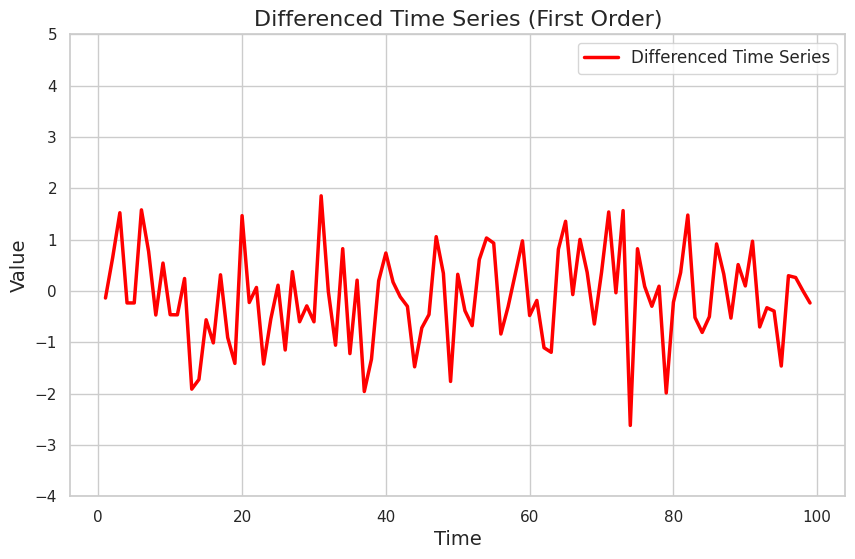

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(ts_diff, label='Differenced Time Series', linewidth=2.5, color='red')
plt.title("Differenced Time Series (First Order)", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.ylim(bottom=-4, top=5)  
plt.legend(fontsize=12)
plt.show()

In [ ]:

model = ARIMA(ts_data, order=(1, 1, 1))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -131.425
Date:                Wed, 12 Mar 2025   AIC                            268.850
Time:                        17:15:59   BIC                            276.635
Sample:                             0   HQIC                           272.000
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3997      5.647      0.071      0.944     -10.669      11.468
ma.L1         -0.4158      5.590     -0.074      0.941     -11.371      10.540
sigma2         0.8329      0.123      6.780      0.0

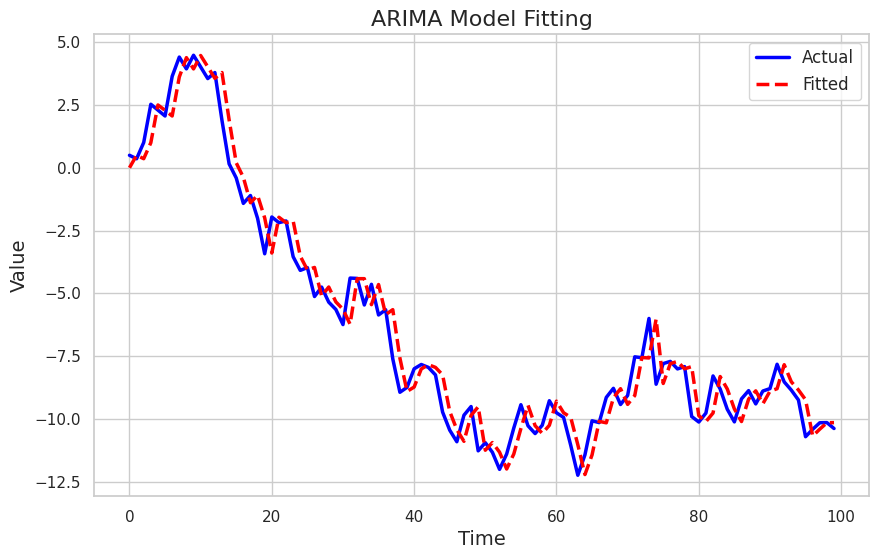

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(ts_data, label="Actual", linewidth=2.5, color='blue')
plt.plot(model_fit.fittedvalues, label="Fitted", linestyle="--", linewidth=2.5, color='red')
plt.legend(fontsize=12)
plt.title("ARIMA Model Fitting", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.show()

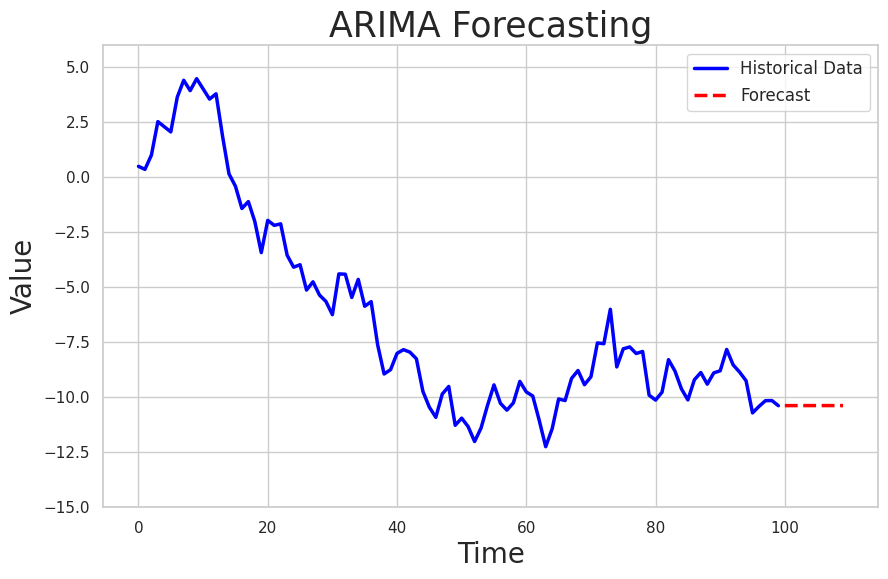

In [ ]:

forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label="Historical Data", linewidth=2.5, color='blue')
plt.plot(range(len(ts_data), len(ts_data) + forecast_steps), forecast, label="Forecast", linestyle="--", linewidth=2.5, color='red')
plt.legend(fontsize=12)
plt.title("ARIMA Forecasting", fontsize=25)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Value", fontsize=20)
plt.ylim(top = 6, bottom= -15)
plt.show()
